<a href="https://colab.research.google.com/github/supulkalhara/Data_Science/blob/main/SEM5_Deep_Learning_Ass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import e
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2163]:
ohe = OneHotEncoder()

## Methods

In [2164]:
def one_hot(y):
  _y = np.zeros((y.size , y.max() + 1))
  _y[np.arange(y.size) , y] = 1
  return _y.T

In [2165]:
# methods for W and b initialization
def default__init__():
  W1 = np.random.randn(14, 100) * np.sqrt(2/14)
  b1 = np.zeros((100, 1))
  W2 = np.random.randn(100, 40) * np.sqrt(2/100)
  b2 = np.zeros((40, 1))
  W3 = np.random.randn(40, 4) * np.sqrt(2/40)
  b3 = np.zeros((4, 1))
  
  return W1, b1, W2, b2, W3, b3

def file__init__(W, b):
  W1 = W.iloc[:14].dropna(axis=1).to_numpy()
  b1 = b.iloc[0].dropna().to_numpy().reshape(100, 1)
  W2 = W.iloc[14:114].dropna(axis=1).to_numpy()
  b2 = b.iloc[1].dropna().to_numpy().reshape(40, 1)
  W3 = W.iloc[114:154].dropna(axis=1).to_numpy()
  b3 = b.iloc[2].dropna().to_numpy().reshape(4, 1)
  
  return W1, b1, W2, b2, W3, b3

In [2166]:
# methods for ReLU
def ReLU(Z):
  return np.maximum(0, Z)

def backward_ReLU(dA, Z):
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

In [2167]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=0)

In [2168]:
# methods for forward and backwards propagations
def forward_propagation(X, params):
  W1, b1, W2, b2, W3, b3 = params

  # layer 1 -> layer 2
  Z1 = (W1.T @ X) + b1 
  A1 = ReLU(Z1)

  # layer 2 -> layer 3
  Z2 = (W2.T @ A1) + b2 
  A2 = ReLU(Z2)

  # layer 3 -> layer 4
  Z3 = (W3.T @ A2) + b3
  A3 = softmax(Z3)

  return X, Z1, A1, Z2, A2, Z3, A3

def backward_propagation(params, values, Y):
  W1, b1, W2, b2, W3, b3 = params
  A0, Z1, A1, Z2, A2, Z3, A3 = values
  m = A3.shape[1]

  dZ3 = A3 - Y
  dW3 = 1. / m * np.dot(dZ3, A2.T)
  db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

  dA2 = W3 @ dZ3
  dZ2 = backward_ReLU(dA2, Z2)
  dW2 = 1. / m * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

  dA1 = (W2 @ dZ2)
  dZ1 = backward_ReLU(dA1, Z1)
  dW1 = 1. / m * np.dot(dZ1, A0.T)
  db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

  return dW1, db1, dW2, db2, dW3, db3

In [2169]:
# method for calculating cost
def find_cost(A, Y):
  return np.sum(-np.sum(Y * np.log(A+1e-20), axis=0)) / Y.shape[1]

In [2170]:
# method for updating parameters
def update_params(params, learning_rate, grads):
  W1, b1, W2, b2, W3, b3 = params
  dW1, db1, dW2, db2, dW3, db3 = grads

  W1 = W1 - learning_rate*dW1.T
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2.T
  b2 = b2 - learning_rate*db2
  W3 = W3 - learning_rate*dW3.T
  b3 = b3 - learning_rate*db3

  return W1, b1, W2, b2, W3, b3

In [2171]:
def predict(X, params):
  values = forward_propagation(X, params)
  A3 = values[-1]
  return A3

In [2172]:
class Model:

  # model and parameters initialization
  def __init__(self, weights="", biases="", random=True):
    if random :
      self.params = default__init__()
    else:
      self.params = file__init__(weights,biases)

  #gradient descent
  def grad_dec(self, X, Y, n_iterations=100, learning_rate=0.001):

    for i in range(n_iterations):
      values = forward_propagation(X, self.params)
      cost = find_cost(values[-1], Y)
      grads = backward_propagation(self.params, values, Y)
      params = update_params(self.params, learning_rate, grads)

    out = params, grads, cost
    return out


---

## __ __init__ __

In [2173]:
X = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1]).reshape(14,1)
Y = np.array([3])
Y = one_hot(Y)

In [2174]:
X

array([[-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1]])

In [2175]:
Y

array([[0.0000000000000000],
       [0.0000000000000000],
       [0.0000000000000000],
       [1.0000000000000000]])

## Task_1/a

In [2176]:
w = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_1/a/w.csv', header=None)
b = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_1/a/b.csv', header=None)
w.drop(0, axis=1, inplace=True)
b.drop(0, axis=1, inplace=True)

In [2177]:
model = Model(weights=w, biases=b, random=False)

In [2178]:
output = model.grad_dec(X, Y, n_iterations=1)
params, grads, cost = output[0], output[1], output[2]
print(cost)

46.051701859880914


46.051701859880914


In [2179]:
predict(X, params)

array([[0.0000000000000000],
       [0.0000000000000000],
       [1.0000000000000000],
       [0.0000000000000000]])

In [2180]:
true_dw = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_1/a/true-dw.csv', header=None)
true_db = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_1/a/true-db.csv', header=None)

In [2181]:
true_dw.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.0,-5.302999,-0.0,-1.029493,-0.0,-0.0,8.007869,0.62155,8.262644,-0.0,...,4.95448,8.113829,-5.106945,-10.410107,-0.0,-1.82363,-4.100732,-4.915877,-2.378255,8.752061
1,0.0,5.302999,0.0,1.029493,0.0,0.0,-8.007869,-0.62155,-8.262644,0.0,...,-4.95448,-8.113829,5.106945,10.410107,0.0,1.82363,4.100732,4.915877,2.378255,-8.752061
2,0.0,5.302999,0.0,1.029493,0.0,0.0,-8.007869,-0.62155,-8.262644,0.0,...,-4.95448,-8.113829,5.106945,10.410107,0.0,1.82363,4.100732,4.915877,2.378255,-8.752061
3,0.0,5.302999,0.0,1.029493,0.0,0.0,-8.007869,-0.62155,-8.262644,0.0,...,-4.95448,-8.113829,5.106945,10.410107,0.0,1.82363,4.100732,4.915877,2.378255,-8.752061
4,-0.0,-5.302999,-0.0,-1.029493,-0.0,-0.0,8.007869,0.62155,8.262644,-0.0,...,4.95448,8.113829,-5.106945,-10.410107,-0.0,-1.82363,-4.100732,-4.915877,-2.378255,8.752061


In [2182]:
dW1 =  true_dw.iloc[:14].dropna(axis=1).to_numpy()
db1 = true_db.iloc[0].dropna().to_numpy().reshape(100, 1)
dW2 =  true_dw.iloc[14:114].dropna(axis=1).to_numpy()
db2 = true_db.iloc[1].dropna().to_numpy().reshape(40, 1)
dW3 =  true_dw.iloc[114:154].dropna(axis=1).to_numpy()
db3 = true_db.iloc[2].dropna().to_numpy().reshape(4, 1)

In [2183]:
grads[2].T

array([[0.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 0.0000000000000000],
       [-2.3095391818072613, 0.0000000000000000, 2.7248771225564767, ...,
        -0.7291543779455072, 0.0000000000000000, 0.0000000000000000],
       [0.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 0.0000000000000000],
       ...,
       [-1.6515336031475980, 0.0000000000000000, 1.9485385516727360, ...,
        -0.5214126551933447, 0.0000000000000000, 0.0000000000000000],
       [-0.3128928709826844, 0.0000000000000000, 0.3691622262431414, ...,
        -0.0987847309550441, 0.0000000000000000, 0.0000000000000000],
       [-0.1276365392150431, 0.0000000000000000, 0.1505901646739752, ...,
        -0.0402966713392736, 0.0000000000000000, 0.0000000000000000]])

In [2184]:
dW2

array([[0.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 0.0000000000000000],
       [-2.3095391818072617, 0.0000000000000000, 2.7248771225564767, ...,
        -0.7291543779455072, 0.0000000000000000, 0.0000000000000000],
       [0.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 0.0000000000000000],
       ...,
       [-1.6515336031475982, 0.0000000000000000, 1.9485385516727360, ...,
        -0.5214126551933447, 0.0000000000000000, 0.0000000000000000],
       [-0.3128928709826848, 0.0000000000000000, 0.3691622262431419, ...,
        -0.0987847309550442, 0.0000000000000000, 0.0000000000000000],
       [-0.1276365392150431, 0.0000000000000000, 0.1505901646739753, ...,
        -0.0402966713392736, 0.0000000000000000, 0.0000000000000000]])

---

## Task_1/b

In [2185]:
w = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_1/b/w-100-40-4.csv', header=None)
b = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_1/b/b-100-40-4.csv', header=None)
w.drop(0, axis=1, inplace=True)
b.drop(0, axis=1, inplace=True)

In [2186]:
model = Model(weights=w, biases=b, random=False)

In [2187]:
output = model.grad_dec(X, Y, n_iterations=1)
params, grads, cost = output[0], output[1], output[2]
print(cost)

1.1102230246251565e-16


In [2188]:
write_w_list = []
write_b_list = []

for i in range(0, 6, 2):
  write_w_list.append(pd.DataFrame(np.round(grads[i].T, 16)))
  write_b_list.append(pd.DataFrame(np.round(grads[i+1].T, 16)))

pd.concat(write_w_list).to_csv("dw.csv", header=False, index=False)
pd.concat(write_b_list).to_csv("db.csv", header=False, index=False)

---

## Task_2

In [2189]:
X_train = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_2/x_train.csv', header=None)
Y_train = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_2/y_train.csv', header=None)
X_test = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_2/x_test.csv', header=None)
Y_test = pd.read_csv('/content/drive/MyDrive/Datasets/SEM5_Deep_Learning_Ass_1/Task_2/y_test.csv', header=None)

In [2190]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1,-1,1,-1,1,-1,1,1,1,1,-1,1,-1,1
1,1,1,-1,-1,-1,1,1,1,-1,-1,1,-1,1,-1
2,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,1
3,1,1,1,1,-1,1,-1,-1,1,-1,1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,-1,1,1


In [2191]:
X = X_train.to_numpy().T
X.shape

(14, 13107)

In [2192]:
Y = ohe.fit_transform(Y_train).toarray().T
Y.shape

(4, 13107)

In [2193]:
X_test = X_test.to_numpy().T
X_test.shape

(14, 3277)

In [2194]:
Y_test = np.squeeze(Y_test.to_numpy())
Y_test = Y_test.reshape(Y_test.shape[0], 1)
Y_test.shape

(3277, 1)

In [2195]:
Y_test_enc = ohe.fit_transform(Y_test).toarray().T

In [2196]:
Y_test_enc

array([[0.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 1.0000000000000000],
       [0.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        1.0000000000000000, 1.0000000000000000, 0.0000000000000000],
       [1.0000000000000000, 0.0000000000000000, 0.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 0.0000000000000000],
       [0.0000000000000000, 1.0000000000000000, 1.0000000000000000, ...,
        0.0000000000000000, 0.0000000000000000, 0.0000000000000000]])

In [2197]:
params = default__init__()

100%|██████████| 10000/10000 [13:24<00:00, 12.43it/s]


Text(0.5, 1.0, 'Testing accuracy vs iteration for learning rate = 1')

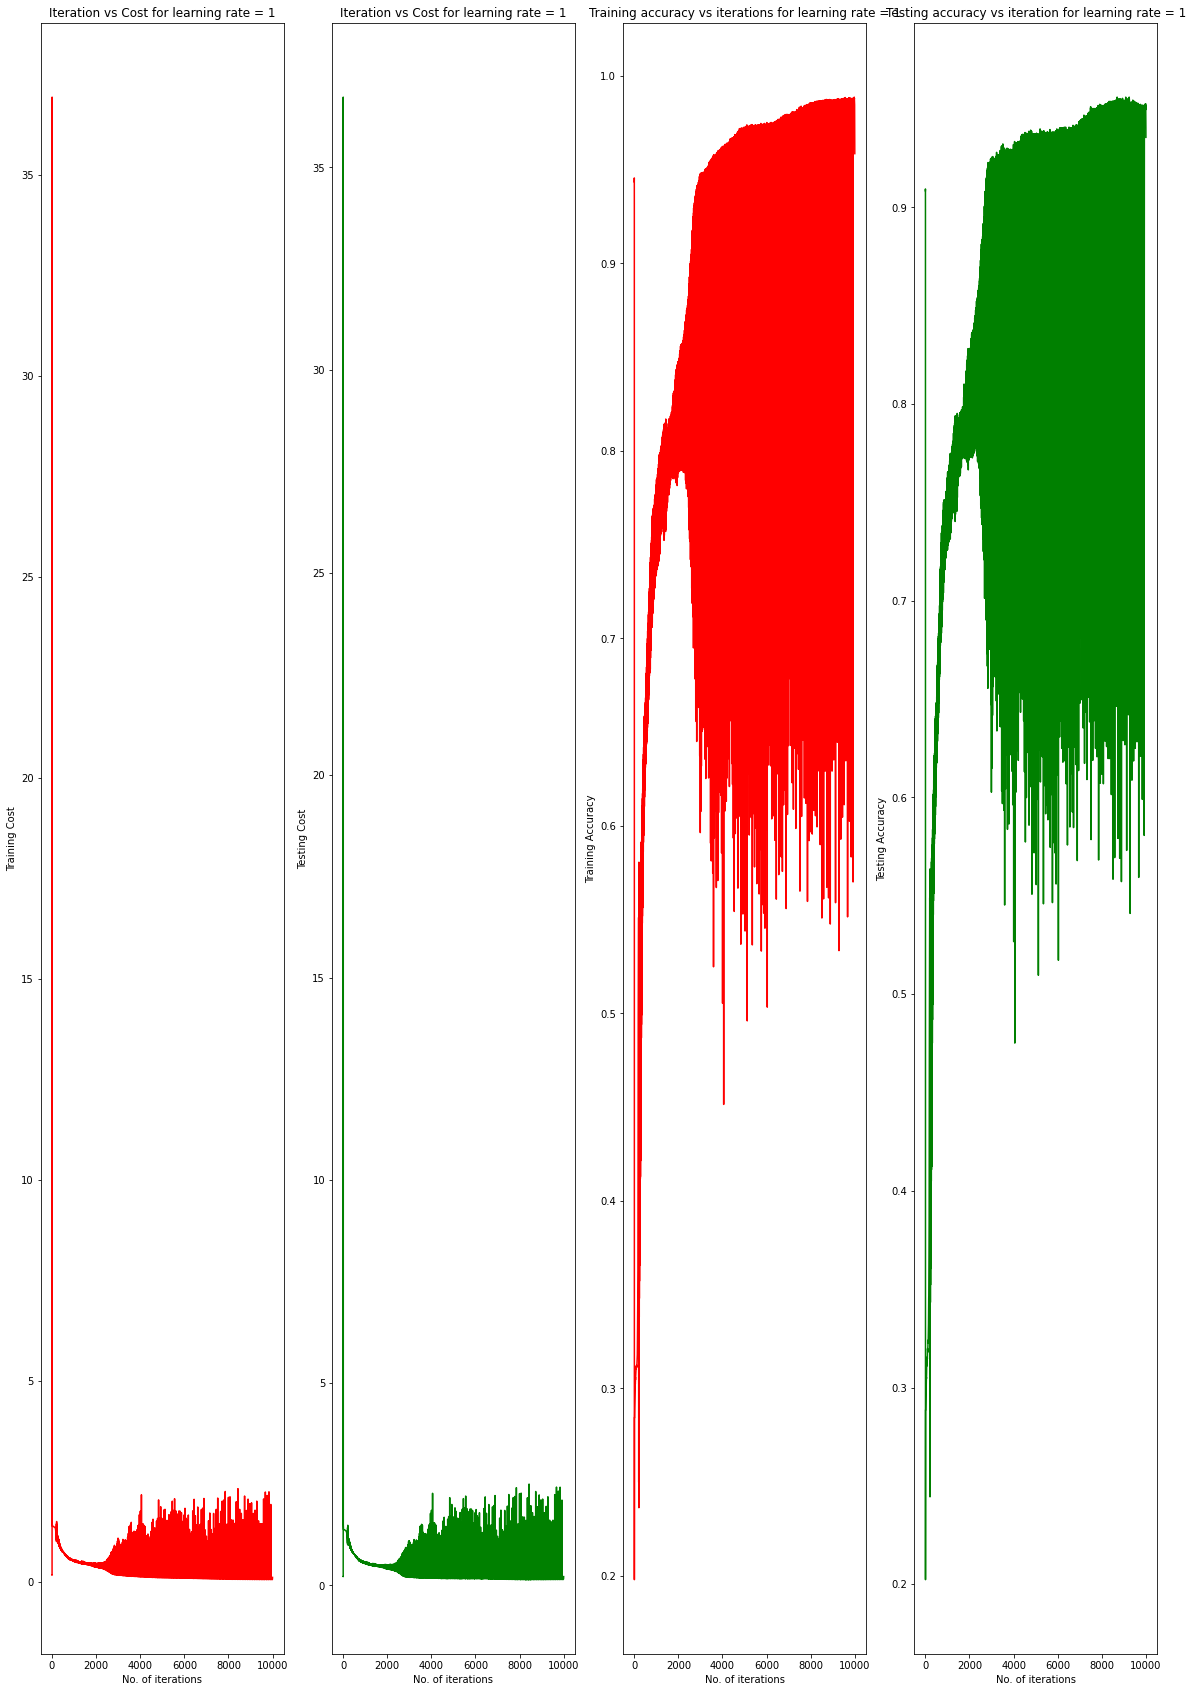

In [2201]:
fig, axes = plt.subplots(1, 4, figsize=(20, 30))

costs = []
accuracy = []
costs_test = []
accuracy_test = []

n_iterations = 10000
learning_rate = 1

for i in tqdm(range(n_iterations)):
  values = forward_propagation(X, params)
  grads = backward_propagation(params, values, Y)
  cost = find_cost(values[-1], Y)
  costs.append(cost)
  
  Y_pred = values[-1]
  Y_pred = ohe.inverse_transform(Y_pred.T)
  Y_inv = ohe.inverse_transform(Y.T)
  accuracy.append(accuracy_score(Y_inv, Y_pred))

  Y_test_pred = forward_propagation(X_test, params)[-1]
  costs_test.append(find_cost(Y_test_pred, Y_test_enc))
  Y_test_pred = ohe.inverse_transform(Y_test_pred.T)
  Y_test_pred = Y_test_pred.reshape(Y_test_pred.shape[0], 1)
  accuracy_test.append(accuracy_score(Y_test, Y_test_pred))

  params = update_params(params, learning_rate, grads)

axes[0].plot(costs, color='red')
axes[0].set_xlabel("No. of iterations")
axes[0].set_ylabel("Training Cost")
axes[0].set_title("Iteration vs Cost for learning rate = " + str(learning_rate))
# axes[0].show()

axes[1].plot(costs_test, color='green')
axes[1].set_xlabel("No. of iterations")
axes[1].set_ylabel("Testing Cost")
axes[1].set_title("Iteration vs Cost for learning rate = " + str(learning_rate))
# axes[1].show()

axes[2].plot(accuracy, color='red')
axes[2].set_xlabel("No. of iterations")
axes[2].set_ylabel("Training Accuracy")
axes[2].set_title("Training accuracy vs iterations for learning rate = " + str(learning_rate))
# axes[2].show()

axes[3].plot(accuracy_test, color='green')
axes[3].set_xlabel("No. of iterations")
axes[3].set_ylabel("Testing Accuracy")
axes[3].set_title("Testing accuracy vs iteration for learning rate = " + str(learning_rate))
# axes[3].show()

### learning rate = *0.1*

100%|██████████| 10000/10000 [13:45<00:00, 12.11it/s]


Text(0.5, 1.0, 'Testing accuracy vs iteration for learning rate = 0.1')

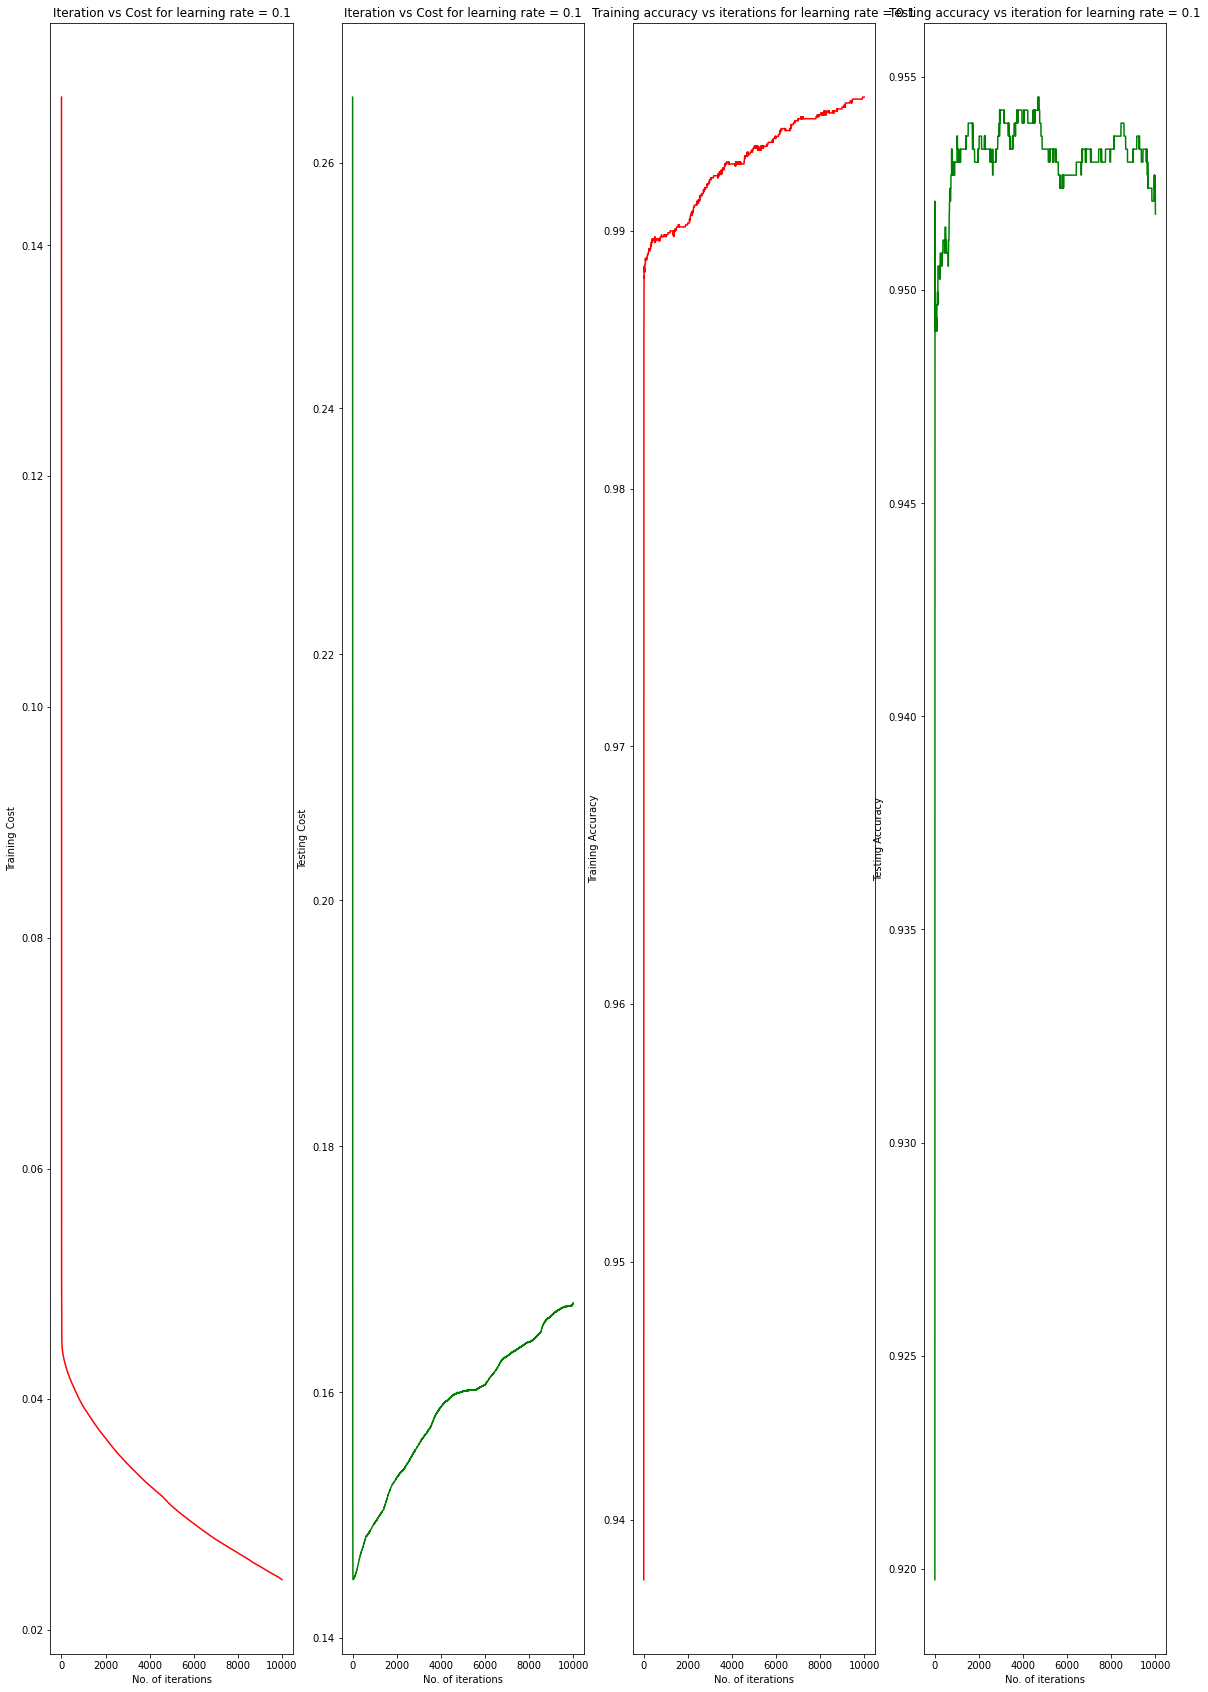

In [2202]:
fig, axes = plt.subplots(1, 4, figsize=(20, 30))

costs = []
accuracy = []
costs_test = []
accuracy_test = []

n_iterations = 10000
learning_rate = 0.1

for i in tqdm(range(n_iterations)):
  values = forward_propagation(X, params)
  grads = backward_propagation(params, values, Y)
  cost = find_cost(values[-1], Y)
  costs.append(cost)
  
  Y_pred = values[-1]
  Y_pred = ohe.inverse_transform(Y_pred.T)
  Y_inv = ohe.inverse_transform(Y.T)
  accuracy.append(accuracy_score(Y_inv, Y_pred))

  Y_test_pred = forward_propagation(X_test, params)[-1]
  costs_test.append(find_cost(Y_test_pred, Y_test_enc))
  Y_test_pred = ohe.inverse_transform(Y_test_pred.T)
  Y_test_pred = Y_test_pred.reshape(Y_test_pred.shape[0], 1)
  accuracy_test.append(accuracy_score(Y_test, Y_test_pred))

  params = update_params(params, learning_rate, grads)

axes[0].plot(costs, color='red')
axes[0].set_xlabel("No. of iterations")
axes[0].set_ylabel("Training Cost")
axes[0].set_title("Iteration vs Cost for learning rate = " + str(learning_rate))
# axes[0].show()

axes[1].plot(costs_test, color='green')
axes[1].set_xlabel("No. of iterations")
axes[1].set_ylabel("Testing Cost")
axes[1].set_title("Iteration vs Cost for learning rate = " + str(learning_rate))
# axes[1].show()

axes[2].plot(accuracy, color='red')
axes[2].set_xlabel("No. of iterations")
axes[2].set_ylabel("Training Accuracy")
axes[2].set_title("Training accuracy vs iterations for learning rate = " + str(learning_rate))
# axes[2].show()

axes[3].plot(accuracy_test, color='green')
axes[3].set_xlabel("No. of iterations")
axes[3].set_ylabel("Testing Accuracy")
axes[3].set_title("Testing accuracy vs iteration for learning rate = " + str(learning_rate))
# axes[3].show()

### learning rate = *0.001*

100%|██████████| 10000/10000 [14:06<00:00, 11.82it/s]


Text(0.5, 1.0, 'Testing accuracy vs iteration for learning rate = 0.001')

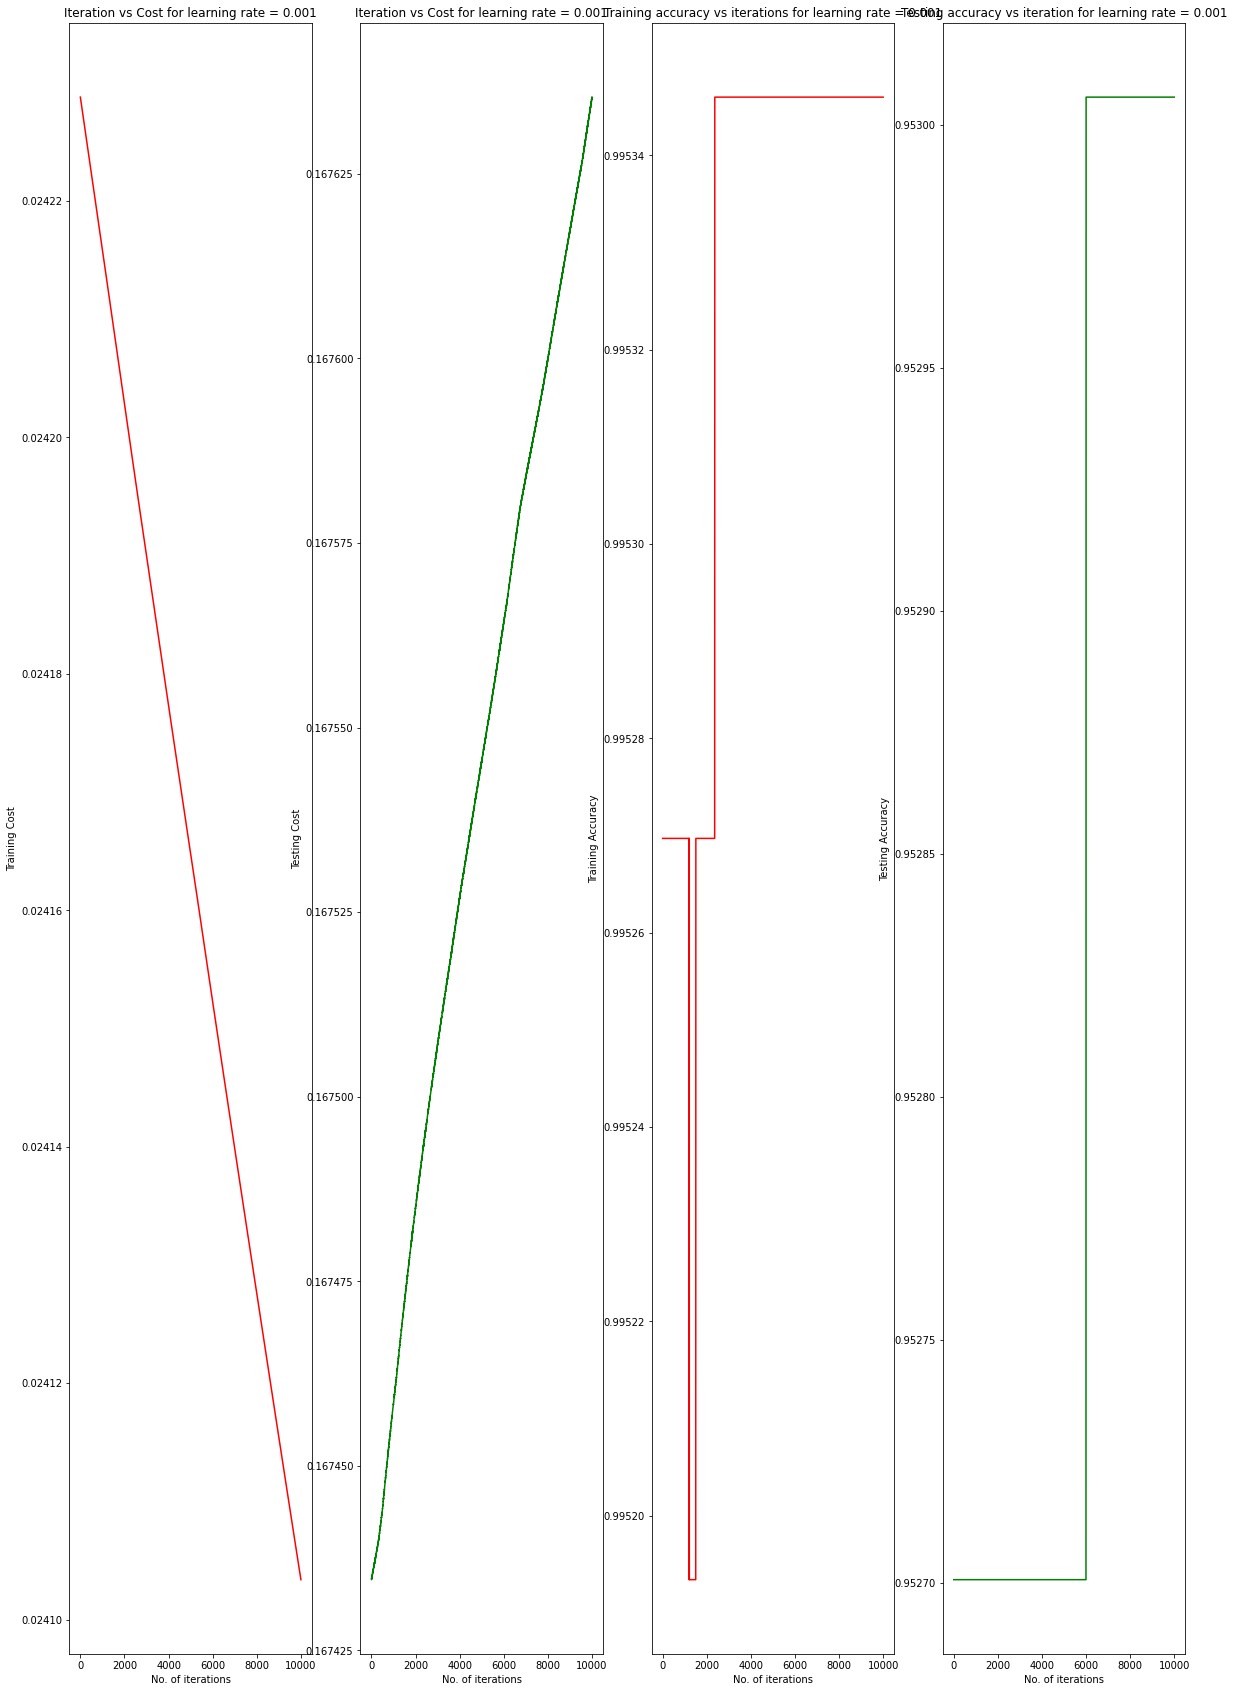

In [2204]:
fig, axes = plt.subplots(1, 4, figsize=(20, 30))

costs = []
accuracy = []
costs_test = []
accuracy_test = []

n_iterations = 10000
learning_rate = 0.001

for i in tqdm(range(n_iterations)):
  values = forward_propagation(X, params)
  grads = backward_propagation(params, values, Y)
  cost = find_cost(values[-1], Y)
  costs.append(cost)
  
  Y_pred = values[-1]
  Y_pred = ohe.inverse_transform(Y_pred.T)
  Y_inv = ohe.inverse_transform(Y.T)
  accuracy.append(accuracy_score(Y_inv, Y_pred))

  Y_test_pred = forward_propagation(X_test, params)[-1]
  costs_test.append(find_cost(Y_test_pred, Y_test_enc))
  Y_test_pred = ohe.inverse_transform(Y_test_pred.T)
  Y_test_pred = Y_test_pred.reshape(Y_test_pred.shape[0], 1)
  accuracy_test.append(accuracy_score(Y_test, Y_test_pred))

  params = update_params(params, learning_rate, grads)

axes[0].plot(costs, color='red')
axes[0].set_xlabel("No. of iterations")
axes[0].set_ylabel("Training Cost")
axes[0].set_title("Iteration vs Cost for learning rate = " + str(learning_rate))
# axes[0].show()

axes[1].plot(costs_test, color='green')
axes[1].set_xlabel("No. of iterations")
axes[1].set_ylabel("Testing Cost")
axes[1].set_title("Iteration vs Cost for learning rate = " + str(learning_rate))
# axes[1].show()

axes[2].plot(accuracy, color='red')
axes[2].set_xlabel("No. of iterations")
axes[2].set_ylabel("Training Accuracy")
axes[2].set_title("Training accuracy vs iterations for learning rate = " + str(learning_rate))
# axes[2].show()

axes[3].plot(accuracy_test, color='green')
axes[3].set_xlabel("No. of iterations")
axes[3].set_ylabel("Testing Accuracy")
axes[3].set_title("Testing accuracy vs iteration for learning rate = " + str(learning_rate))
# axes[3].show()

---